In [1]:
# Loading the IMDB dataset and only keeping the top 10000 most frequently occurring words 
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


In [2]:
# dictionary mapping words to an integer index
word_index = imdb.get_word_index() 
# mapping integer indices to words 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Decoding the review by noting that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
import numpy as np

In [4]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# Vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Defining the model as two fully connected layers and a final output layer with sigmoid activation 
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compiling the model 
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Compiling the model 
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [10]:
# Separating the training and hold-out data points and labels  
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [12]:
# Fitting data to the model 
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 275us/step - loss: 0.5096 - acc: 0.7777 - val_loss: 0.3990 - val_acc: 0.8474
Epoch 2/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.3034 - acc: 0.9006 - val_loss: 0.3117 - val_acc: 0.8834
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2199 - acc: 0.9279 - val_loss: 0.2915 - val_acc: 0.8842
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1719 - acc: 0.9461 - val_loss: 0.2771 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1390 - acc: 0.9560 - val_loss: 0.2829 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1126 - acc: 0.9665 - val_loss: 0.2999 - val_acc: 0.8855
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0972 - acc: 0.9694 - val_loss: 0.3396 - 

In [13]:
history_dict = history.history

In [14]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

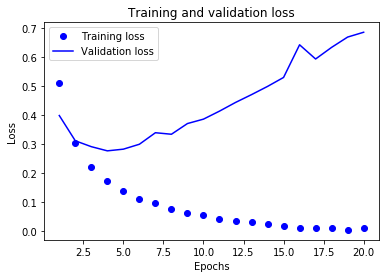

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

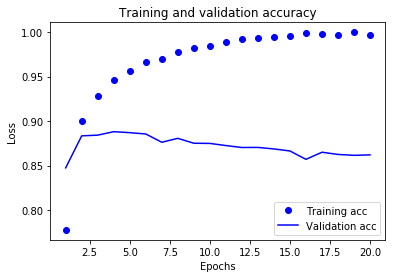

In [17]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc') # bo is for blue dot 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') # b is solid blue line 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Trying regularization  
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.5052 - acc: 0.8109
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.3187 - acc: 0.9048
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.2712 - acc: 0.9212
Epoch 4/4
25000/25000 [==============================] - 5s 208us/step


In [19]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [23]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.2469 - acc: 0.9279 - val_loss: 0.2390 - val_acc: 0.9325
Epoch 2/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2144 - acc: 0.9435 - val_loss: 0.2561 - val_acc: 0.9232
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2016 - acc: 0.9507 - val_loss: 0.2750 - val_acc: 0.9133
Epoch 4/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1946 - acc: 0.9539 - val_loss: 0.2920 - val_acc: 0.9060
Epoch 5/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1839 - acc: 0.9588 - val_loss: 0.3145 - val_acc: 0.8960
Epoch 6/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1755 - acc: 0.9638 - val_loss: 0.3337 - val_acc: 0.8911
Epoch 7/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1722 - acc: 0.9632 - val_loss: 0.3462 - 

In [24]:
history_dict = history.history

In [25]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

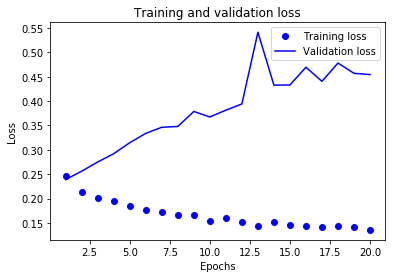

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

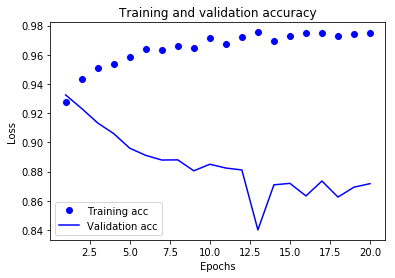

In [27]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
# Severe overfitting, solution: early stoppage 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.4442 - acc: 0.8279
Epoch 2/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.2576 - acc: 0.9121
Epoch 3/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2006 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 3s 135us/step


In [30]:
results 

[0.28998089448928832, 0.88575999999999999]

In [31]:
model.predict(x_test)

array([[  4.13627073e-04],
       [  9.15258706e-01],
       [  3.81248683e-01],
       ..., 
       [  9.17626143e-01],
       [  1.01159578e-02],
       [  9.61992681e-01]], dtype=float32)

In [33]:
# Dropout 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [35]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 258us/step - loss: 0.6390 - acc: 0.6209 - val_loss: 0.5387 - val_acc: 0.8282
Epoch 2/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.5136 - acc: 0.7622 - val_loss: 0.4299 - val_acc: 0.8711
Epoch 3/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.4379 - acc: 0.8198 - val_loss: 0.3626 - val_acc: 0.8825
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.3673 - acc: 0.8636 - val_loss: 0.3038 - val_acc: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.3240 - acc: 0.8827 - val_loss: 0.2844 - val_acc: 0.8907
Epoch 6/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.2836 - acc: 0.9003 - val_loss: 0.2794 - val_acc: 0.8906
Epoch 7/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2462 - acc: 0.9173 - val_loss: 0.2826 - 

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

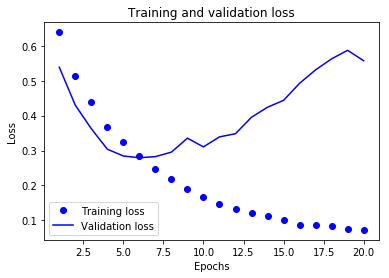

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()